## Exploring the Data 
### 08/07/2025
I had an idea to compare NIMO vs Swarm and PyIRI vs Swarm to <br>
NIMO (+1 day) vs Swarm to PyIRI (+1 day) to Swarm respectively. <br>
Basically, I want to see what kind of intricacies NIMO and PyIRI catch. <br>
Ideally, the models should match Swarm of the same day better than <br>
the models (+ 1day) match Swarm. <br>
The reason I did this is beacuse I had a suspicion that PyIRI would <br>
Be fairly similar no matter what day I use and NIMO would be more different <br>
hence showing that even if NIMO does worse in some tests, maybe it does better <br>
in a test of accuracy. <br> 
For this reason, I created a separate code offset_codes.NIMO_SWARM_mapplot_offset <br>
In this, you can specify the number of days to offset NIMO compared to swarm <br>
e.g. if the offset is 1 and Swarm is at January 5, then NIMO data at January 6 is used. <br>
The offset can also be negatvie indicating a decrease in days and a larger number than 1 <br>
A word of caution, save these files in a separate location from your original daily files <br>
because the filenames will be the same to make open_daily_files.open_daily work. <br>
The figures will have a different name. <br>
Once you have new daily files, you can run SwarmPyIRI.PyIRI_NIMO_SWARM_plot to get <br>
the offset PyIRI files since that one is based off of the same time as NIMO <br>
Then you can run some stats as shown below and as outlined in Swarm_Stats_Walkthrough.

In [2]:
import pandas as pd
from datetime import datetime, timedelta
# Self Created Functions --------------------------
# Swarm downlaod and load functions
from download_swarm import download_and_unzip

# Plotting NIMO and Swarm together
from NIMO_Swarm_Map_Plotting import find_all_gaps, NIMO_SWARM_mapplot
from NIMO_SWARM_single import nimo_swarm_single_plot
from SwarmPyIRI import PyIRI_NIMO_SWARM_plot

from swarm_panel_ax import swarm_panel
import matplotlib.pyplot as plt

from Swarm_Stats import states_report_swarm, LSS_plot_Swarm, map_hist_panel, plot_hist_quad_maps, Liemohn_Skill_Scores
from Swarm_Stats import decision_table_sat, style_df_table, HMFC_percent_panel, HMFC_percent_figure
from Swarm_Stats import style_LSS_table, LSS_table_sat
from offset_codes import NIMO_SWARM_mapplot_offset

In [ ]:
# Create new NIMO files
fig_dir='~/Plots/NIMO_SWARM_offsets'
file_dir='~/Type_Files/Daily_offsets'
swarm_fdir = '~/swarm_data'
nimo_fdir='~/data/NIMO/'

mlat_val = 30
stime1 = datetime(2020, 4, 15, 0, 0)  # Starting Date

for i in range(15):  # How many days you want to make files for
    stime = stime1 + timedelta(days=i)
    print(stime)
    df = NIMO_SWARM_mapplot_offset(
        stime, swarm_fdir, nimo_fdir, offset=1, file_dir=file_dir,
        fig_on=False, fig_dir=fig_dir)

2020-04-15 00:00:00


In [ ]:
# Create new PyIRI files 
# PyIRI files are created using NIMO info, so you don't need to specify the offset here
# Save the files in a separate folder from original Daily files
fig_dir='~/Plots/NIMO_SWARM_offsets'
daily_dir='~/Type_Files/Daily_offsets'
swarm_fdir = '~/swarm_data'

stime1 = datetime(2020, 4, 15, 0, 0)  

for i in range(15):  # How many days you want to make files for
    stime = stime1 + timedelta(days=i)
    print(stime)
    pdf = PyIRI_NIMO_SWARM_plot(stime, daily_dir, swarm_fdir, fig_on=True,
                                fig_save_dir=fig_dir, file_save_dir=daily_dir)

In [3]:
# Original data states_report
date_range = pd.date_range(start='2020-04-05',  end='2020-04-29')
daily_files = '~/Type_Files/Daily'
Nimo_og, Sw_og, PyI_og = states_report_swarm(date_range, daily_files, typ='eia')

In [4]:
# offset by 1 day states report
date_range = pd.date_range(start='2020-04-05',  end='2020-04-29')
daily_files = '~/Type_Files/Daily_offsets'
Nimo_1d, Sw_1d, PyI_1d = states_report_swarm(date_range, daily_files, typ='eia')

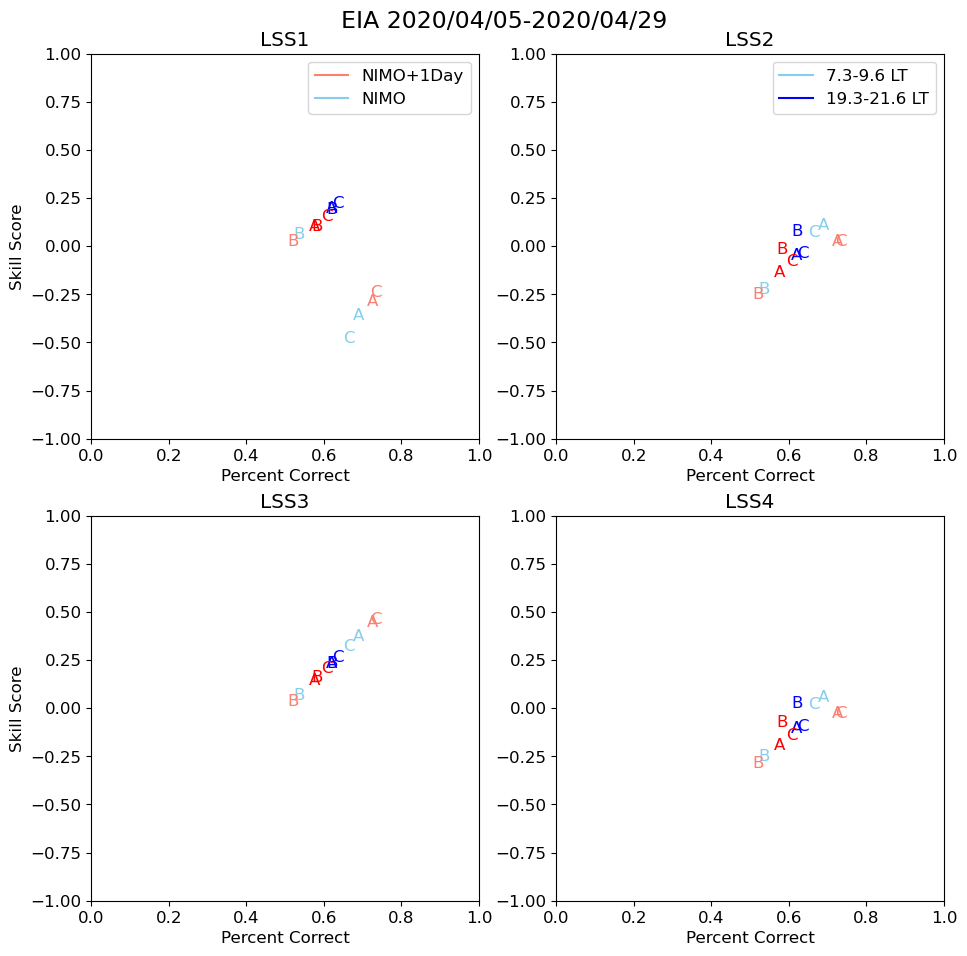

In [6]:
# Comparing NIMO original to NIMO 1 day offset
plt.rcParams.update({'font.size': 12})
fig = LSS_plot_Swarm(Nimo_og, Nimo_1d, 'EIA', date_range, model1_name='NIMO', model2_name='NIMO+1Day', PorC='PC', coin=False)


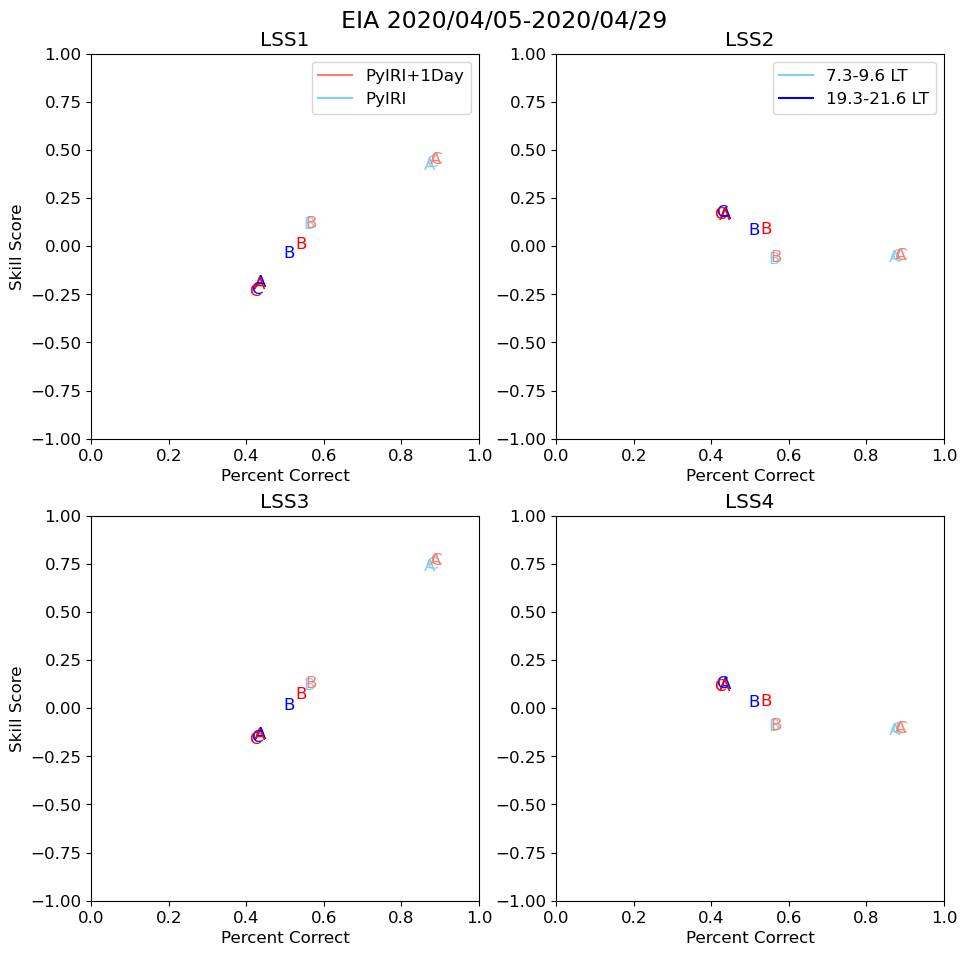

In [7]:
# Comparing NIMO original to NIMO 1 day offset
plt.rcParams.update({'font.size': 12})
fig = LSS_plot_Swarm(PyI_og, PyI_1d, 'EIA', date_range,
                     model1_name='PyIRI', model2_name='PyIRI+1Day',
                     PorC='PC', coin=False)


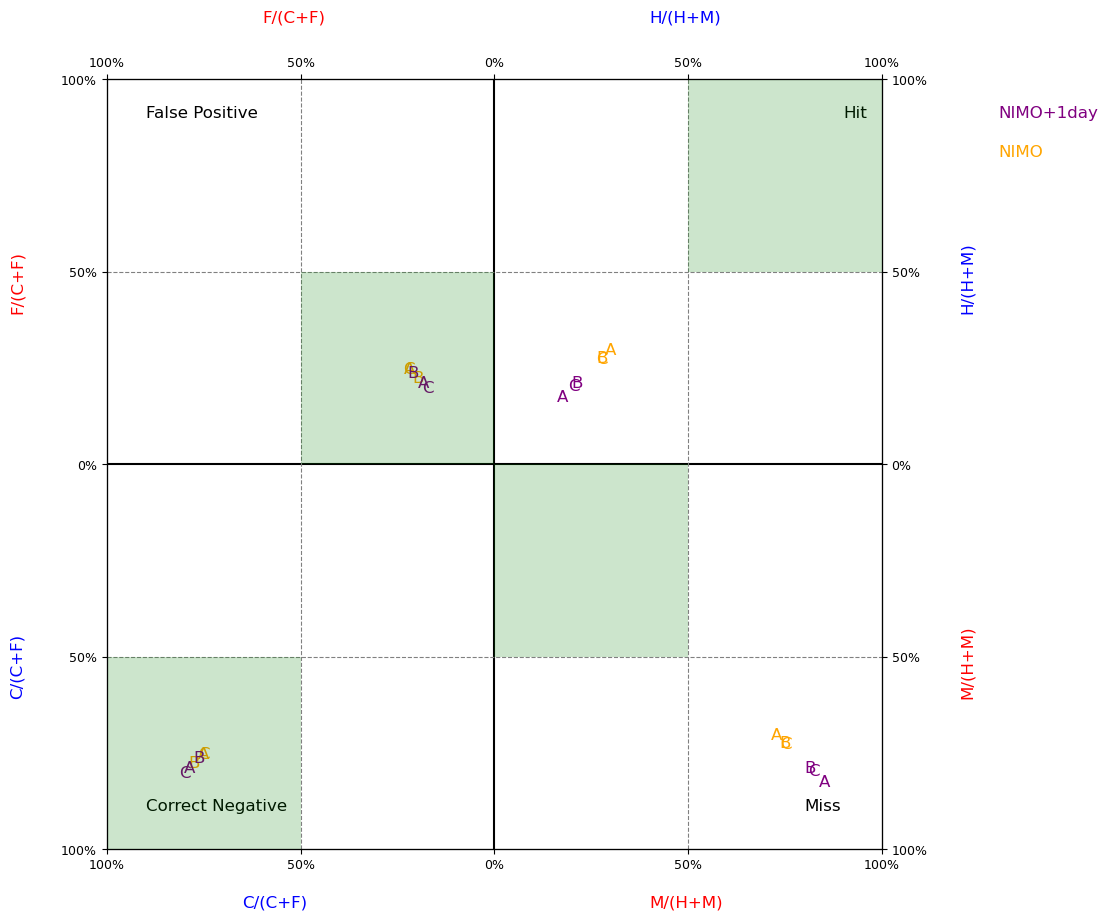

In [28]:
fig = HMFC_percent_figure(Nimo_og, Nimo_1d, 'eia', model1_name='NIMO', model2_name='NIMO+1day', col1='orange', col2='purple', fosi=12)

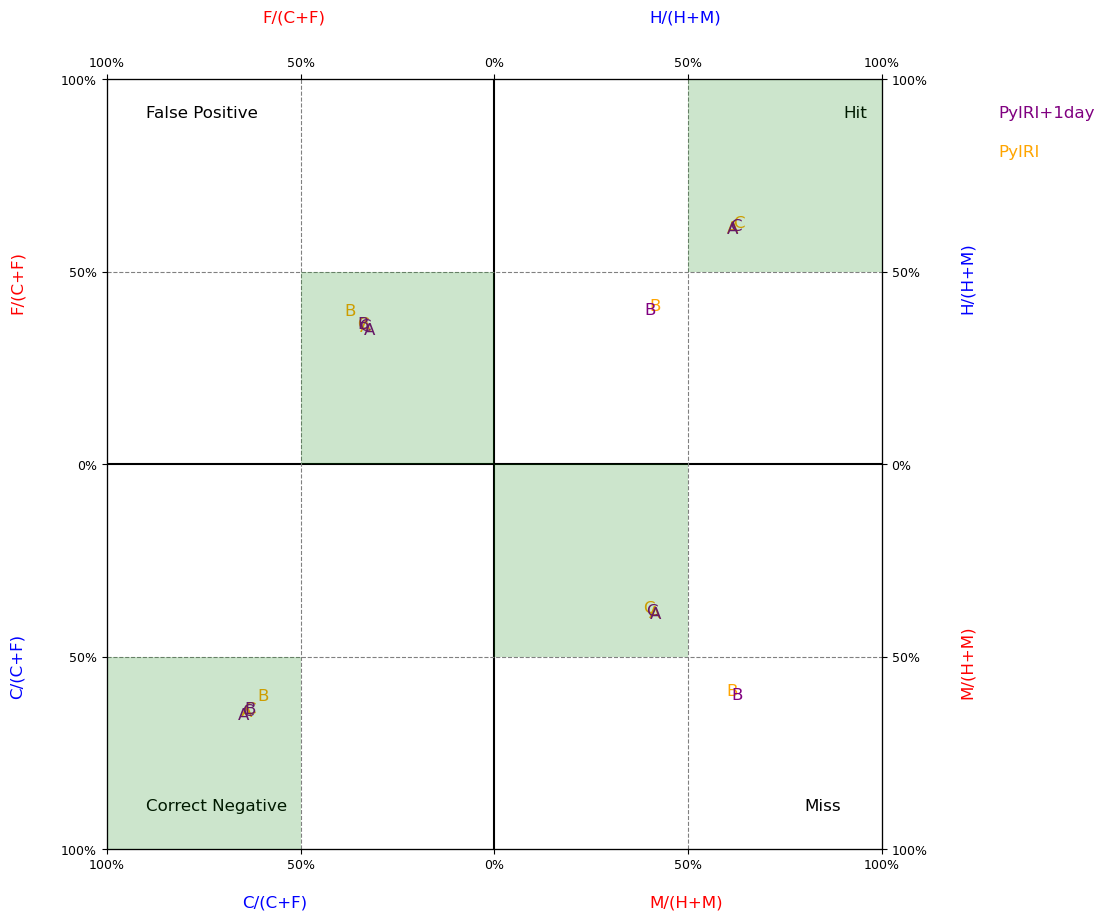

In [29]:
fig = HMFC_percent_figure(PyI_og, PyI_1d, 'eia', model1_name='PyIRI', model2_name='PyIRI+1day', col1='orange', col2='purple', fosi=12)